In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
df = pd.read_csv('datareview_gojek20000.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a5f8e38a-b160-406a-9209-b612a2c8722a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,izin pak.. apk ini keknya perlu pembaharuan di...,4,0,NaN,7/28/2025 5:41,NaN,NaN,NaN
1,119f76f4-2bc7-4e19-a3b9-187a2f4bd487,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sangat ok, mudah di gunakan 👍👍👍",5,0,5.25.1,7/28/2025 5:35,NaN,NaN,5.25.1
2,f4a987cd-0ef2-4c22-80f5-5b368c7b254d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi nya kenapa sering blank ya ga bisa di...,4,1,5.25.1,7/28/2025 5:26,NaN,NaN,5.25.1
3,cc7b3589-5a5e-4f69-8f60-35efbd84cf90,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,senang,5,0,5.24.2,7/28/2025 5:26,NaN,NaN,5.24.2
4,9e4c1ad2-4444-4ade-9193-a6e3f9be92d8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,5.24.2,7/28/2025 5:11,NaN,NaN,5.24.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               20000 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  15713 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          5318 non-null   object
 9   repliedAt             5318 non-null   object
 10  appVersion            15713 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [ ]:
df = df.dropna(subset=['content', 'score'])
df = df.drop_duplicates(subset=['content'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13734 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              13734 non-null  object
 1   userName              13734 non-null  object
 2   userImage             13734 non-null  object
 3   content               13734 non-null  object
 4   score                 13734 non-null  int64 
 5   thumbsUpCount         13734 non-null  int64 
 6   reviewCreatedVersion  10766 non-null  object
 7   at                    13734 non-null  object
 8   replyContent          5283 non-null   object
 9   repliedAt             5283 non-null   object
 10  appVersion            10766 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [ ]:
df['score'].value_counts()

,count
score,
5,7600
1,4163
4,688
3,666
2,617


In [ ]:
df = pd.DataFrame(df[['content','score']])
df.head()

,content,score
0,izin pak.. apk ini keknya perlu pembaharuan di...,4
1,"sangat ok, mudah di gunakan 👍👍👍",5
2,aplikasi nya kenapa sering blank ya ga bisa di...,4
3,senang,5
4,bagus,5


In [ ]:
df['lower_content'] = df['content'].str.lower()
df.head(20)

,content,score,lower_content
0,izin pak.. apk ini keknya perlu pembaharuan di...,4,izin pak.. apk ini keknya perlu pembaharuan di...
1,"sangat ok, mudah di gunakan 👍👍👍",5,"sangat ok, mudah di gunakan 👍👍👍"
2,aplikasi nya kenapa sering blank ya ga bisa di...,4,aplikasi nya kenapa sering blank ya ga bisa di...
3,senang,5,senang
4,bagus,5,bagus
5,ok,5,ok
6,Pelayanan 👍,5,pelayanan 👍
7,sangat membantu buat yg doyan mageran 😁,5,sangat membantu buat yg doyan mageran 😁
8,the best,5,the best
9,baik bgt,5,baik bgt


In [ ]:
def clean_text(text):
  text = re.sub(r'[^\w\s,]', '', text) # Menghapus karakter yang bukan huruf, angka, atau koma
  text = re.sub(r'[0-9]+', '', text) # Menghapus semua angka
  text = re.sub(r"http\S+", '', text) # Menghapus link atau URL
  text = re.sub(r'[^a-z\s]', '', text) # Menghapus karakter selain huruf kecil (a-z) dan spasi
  text = re.sub(r'\s+', ' ', text).strip() # Menghilangkan spasi ganda dan spasi di awal/akhir
  text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus semua tanda baca
  return text

df['text_bersih'] = df['lower_content'].apply(clean_text)
df.head(20)

,content,score,lower_content,text_bersih
0,izin pak.. apk ini keknya perlu pembaharuan di...,4,izin pak.. apk ini keknya perlu pembaharuan di...,izin pak apk ini keknya perlu pembaharuan di b...
1,"sangat ok, mudah di gunakan 👍👍👍",5,"sangat ok, mudah di gunakan 👍👍👍",sangat ok mudah di gunakan
2,aplikasi nya kenapa sering blank ya ga bisa di...,4,aplikasi nya kenapa sering blank ya ga bisa di...,aplikasi nya kenapa sering blank ya ga bisa di...
3,senang,5,senang,senang
4,bagus,5,bagus,bagus
5,ok,5,ok,ok
6,Pelayanan 👍,5,pelayanan 👍,pelayanan
7,sangat membantu buat yg doyan mageran 😁,5,sangat membantu buat yg doyan mageran 😁,sangat membantu buat yg doyan mageran
8,the best,5,the best,the best
9,baik bgt,5,baik bgt,baik bgt


In [ ]:
import nltk
nltk.download('punkt_tab')

def tokenize(text):
    return word_tokenize(text)

df['tokenized'] = df['text_bersih'].apply(tokenize)
df.head(20)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,content,score,lower_content,text_bersih,tokenized
0,izin pak.. apk ini keknya perlu pembaharuan di...,4,izin pak.. apk ini keknya perlu pembaharuan di...,izin pak apk ini keknya perlu pembaharuan di b...,"[izin, pak, apk, ini, keknya, perlu, pembaharu..."
1,"sangat ok, mudah di gunakan 👍👍👍",5,"sangat ok, mudah di gunakan 👍👍👍",sangat ok mudah di gunakan,"[sangat, ok, mudah, di, gunakan]"
2,aplikasi nya kenapa sering blank ya ga bisa di...,4,aplikasi nya kenapa sering blank ya ga bisa di...,aplikasi nya kenapa sering blank ya ga bisa di...,"[aplikasi, nya, kenapa, sering, blank, ya, ga,..."
3,senang,5,senang,senang,[senang]
4,bagus,5,bagus,bagus,[bagus]
5,ok,5,ok,ok,[ok]
6,Pelayanan 👍,5,pelayanan 👍,pelayanan,[pelayanan]
7,sangat membantu buat yg doyan mageran 😁,5,sangat membantu buat yg doyan mageran 😁,sangat membantu buat yg doyan mageran,"[sangat, membantu, buat, yg, doyan, mageran]"
8,the best,5,the best,the best,"[the, best]"
9,baik bgt,5,baik bgt,baik bgt,"[baik, bgt]"


In [ ]:
kamus_df = pd.read_csv('kamusalay.csv')

kamusalay = dict(zip(kamus_df['slang'], kamus_df['formal']))

print(f"Jumlah entri kamus slang: {len(kamusalay)}")
print("Contoh: ", {k: kamusalay[k] for k in list(kamusalay)[:5]})

Jumlah entri kamus slang: 4331
Contoh:  {'woww': 'wow', 'aminn': 'amin', 'met': 'selamat', 'netaas': 'menetas', 'keberpa': 'keberapa'}


In [ ]:
def normalize_slang(tokens):
    normalized_tokens = []
    for word in tokens:
        normalized_word = kamusalay.get(word.lower(), word)
        normalized_tokens.append(normalized_word)
    return normalized_tokens

In [ ]:
df['normalized_tokens'] = df['tokenized'].apply(normalize_slang)

df.head(20)

,content,score,lower_content,text_bersih,tokenized,normalized_tokens
0,izin pak.. apk ini keknya perlu pembaharuan di...,4,izin pak.. apk ini keknya perlu pembaharuan di...,izin pak apk ini keknya perlu pembaharuan di b...,"[izin, pak, apk, ini, keknya, perlu, pembaharu...","[izin, pak, apk, ini, kayaknya, perlu, pembaha..."
1,"sangat ok, mudah di gunakan 👍👍👍",5,"sangat ok, mudah di gunakan 👍👍👍",sangat ok mudah di gunakan,"[sangat, ok, mudah, di, gunakan]","[sangat, ok, mudah, di, gunakan]"
2,aplikasi nya kenapa sering blank ya ga bisa di...,4,aplikasi nya kenapa sering blank ya ga bisa di...,aplikasi nya kenapa sering blank ya ga bisa di...,"[aplikasi, nya, kenapa, sering, blank, ya, ga,...","[aplikasi, nya, kenapa, sering, blank, ya, eng..."
3,senang,5,senang,senang,[senang],[senang]
4,bagus,5,bagus,bagus,[bagus],[bagus]
5,ok,5,ok,ok,[ok],[ok]
6,Pelayanan 👍,5,pelayanan 👍,pelayanan,[pelayanan],[pelayanan]
7,sangat membantu buat yg doyan mageran 😁,5,sangat membantu buat yg doyan mageran 😁,sangat membantu buat yg doyan mageran,"[sangat, membantu, buat, yg, doyan, mageran]","[sangat, membantu, buat, yang, doyan, mageran]"
8,the best,5,the best,the best,"[the, best]","[the, best]"
9,baik bgt,5,baik bgt,baik bgt,"[baik, bgt]","[baik, banget]"


In [ ]:
import nltk
nltk.download('stopwords')


stopwords = set(stopwords.words('indonesian'))
stopwords.update(['yg', 'utk', 'aja', 'nih', 'sih', 'deh', 'dong'])
df['stopwords_dihapus'] = df['normalized_tokens'].apply(lambda tokens: [word for word in tokens if word not in stopwords])

df.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,lower_content,text_bersih,tokenized,normalized_tokens,stopwords_dihapus
0,izin pak.. apk ini keknya perlu pembaharuan di...,4,izin pak.. apk ini keknya perlu pembaharuan di...,izin pak apk ini keknya perlu pembaharuan di b...,"[izin, pak, apk, ini, keknya, perlu, pembaharu...","[izin, pak, apk, ini, kayaknya, perlu, pembaha...","[izin, apk, kayaknya, pembaharuan, fitur, chat..."
1,"sangat ok, mudah di gunakan 👍👍👍",5,"sangat ok, mudah di gunakan 👍👍👍",sangat ok mudah di gunakan,"[sangat, ok, mudah, di, gunakan]","[sangat, ok, mudah, di, gunakan]","[ok, mudah]"
2,aplikasi nya kenapa sering blank ya ga bisa di...,4,aplikasi nya kenapa sering blank ya ga bisa di...,aplikasi nya kenapa sering blank ya ga bisa di...,"[aplikasi, nya, kenapa, sering, blank, ya, ga,...","[aplikasi, nya, kenapa, sering, blank, ya, eng...","[aplikasi, nya, blank, ya, klik, doang, merasai]"
3,senang,5,senang,senang,[senang],[senang],[senang]
4,bagus,5,bagus,bagus,[bagus],[bagus],[bagus]
5,ok,5,ok,ok,[ok],[ok],[ok]
6,Pelayanan 👍,5,pelayanan 👍,pelayanan,[pelayanan],[pelayanan],[pelayanan]
7,sangat membantu buat yg doyan mageran 😁,5,sangat membantu buat yg doyan mageran 😁,sangat membantu buat yg doyan mageran,"[sangat, membantu, buat, yg, doyan, mageran]","[sangat, membantu, buat, yang, doyan, mageran]","[membantu, doyan, mageran]"
8,the best,5,the best,the best,"[the, best]","[the, best]","[the, best]"
9,baik bgt,5,baik bgt,baik bgt,"[baik, bgt]","[baik, banget]",[banget]


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

df['stemmed_content'] = df['stopwords_dihapus'].apply(stemming)
df['stemmed_content'] = df['stemmed_content'].apply(lambda tokens: ' '.join(tokens))
df.head(20)

,content,score,lower_content,text_bersih,tokenized,normalized_tokens,stopwords_dihapus,stemmed_content
0,izin pak.. apk ini keknya perlu pembaharuan di...,4,izin pak.. apk ini keknya perlu pembaharuan di...,izin pak apk ini keknya perlu pembaharuan di b...,"[izin, pak, apk, ini, keknya, perlu, pembaharu...","[izin, pak, apk, ini, kayaknya, perlu, pembaha...","[izin, apk, kayaknya, pembaharuan, fitur, chat...",izin apk kayak baharu fitur chat lot banget pl...
1,"sangat ok, mudah di gunakan 👍👍👍",5,"sangat ok, mudah di gunakan 👍👍👍",sangat ok mudah di gunakan,"[sangat, ok, mudah, di, gunakan]","[sangat, ok, mudah, di, gunakan]","[ok, mudah]",ok mudah
2,aplikasi nya kenapa sering blank ya ga bisa di...,4,aplikasi nya kenapa sering blank ya ga bisa di...,aplikasi nya kenapa sering blank ya ga bisa di...,"[aplikasi, nya, kenapa, sering, blank, ya, ga,...","[aplikasi, nya, kenapa, sering, blank, ya, eng...","[aplikasi, nya, blank, ya, klik, doang, merasai]",aplikasi nya blank ya klik doang rasai
3,senang,5,senang,senang,[senang],[senang],[senang],senang
4,bagus,5,bagus,bagus,[bagus],[bagus],[bagus],bagus
5,ok,5,ok,ok,[ok],[ok],[ok],ok
6,Pelayanan 👍,5,pelayanan 👍,pelayanan,[pelayanan],[pelayanan],[pelayanan],layan
7,sangat membantu buat yg doyan mageran 😁,5,sangat membantu buat yg doyan mageran 😁,sangat membantu buat yg doyan mageran,"[sangat, membantu, buat, yg, doyan, mageran]","[sangat, membantu, buat, yang, doyan, mageran]","[membantu, doyan, mageran]",bantu doyan mageran
8,the best,5,the best,the best,"[the, best]","[the, best]","[the, best]",the best
9,baik bgt,5,baik bgt,baik bgt,"[baik, bgt]","[baik, banget]",[banget],banget


In [ ]:
df.to_csv('hasilpreprocess.csv',index=False)

In [ ]:
negative_reviews_df = df[df['score'] == 1]
negative_reviews_df.head(30)

,content,score,lower_content,text_bersih,tokenized,normalized_tokens,stopwords_dihapus,stemmed_content
11,ayo semakin giat untuk sosialisasi teman2 bahw...,1,ayo semakin giat untuk sosialisasi teman2 bahw...,ayo semakin giat untuk sosialisasi teman bahwa...,"[ayo, semakin, giat, untuk, sosialisasi, teman...","[ayo, semakin, giat, untuk, sosialisasi, teman...","[ayo, giat, sosialisasi, teman, aplikasi, goje...",ayo giat sosialisasi teman aplikasi gojek unii...
20,"mau masuk mau daftar dibikin ribedd, padahal v...",1,"mau masuk mau daftar dibikin ribedd, padahal v...",mau masuk mau daftar dibikin ribedd padahal ve...,"[mau, masuk, mau, daftar, dibikin, ribedd, pad...","[mau, masuk, mau, daftar, dibikin, ribedd, pad...","[masuk, daftar, dibikin, ribedd, verivikasi, m...",masuk daftar bikin ribedd verivikasi muka gaga...
32,"Kalau pesan goride di jam"" pagi kenapa ya apli...",1,"kalau pesan goride di jam"" pagi kenapa ya apli...",kalau pesan goride di jam pagi kenapa ya aplik...,"[kalau, pesan, goride, di, jam, pagi, kenapa, ...","[kalau, pesan, goride, di, jam, pagi, kenapa, ...","[pesan, goride, jam, pagi, ya, aplikasinya, ng...",pesan goride jam pagi ya aplikasi ngebug pesan...
38,"dapet driver kek apaan tau, bilangnya ""mohon d...",1,"dapet driver kek apaan tau, bilangnya ""mohon d...",dapet driver kek apaan tau bilangnya mohon dit...,"[dapet, driver, kek, apaan, tau, bilangnya, mo...","[dapat, driver, kayak, apaan, tau, bilangnya, ...","[driver, kayak, tau, bilangnya, mohon, ditungg...",driver kayak tau bilang mohon tunggu jam diam ...
40,pengemudi mobil tidak ramah dan belagu,1,pengemudi mobil tidak ramah dan belagu,pengemudi mobil tidak ramah dan belagu,"[pengemudi, mobil, tidak, ramah, dan, belagu]","[pengemudi, mobil, tidak, ramah, dan, belagu]","[pengemudi, mobil, ramah, belagu]",kemudi mobil ramah belagu
41,"pinjaman saya di tolak,payah",1,"pinjaman saya di tolak,payah",pinjaman saya di tolakpayah,"[pinjaman, saya, di, tolakpayah]","[pinjaman, saya, di, tolakpayah]","[pinjaman, tolakpayah]",pinjam tolakpayah
48,promonya kadang gabisa dipake,1,promonya kadang gabisa dipake,promonya kadang gabisa dipake,"[promonya, kadang, gabisa, dipake]","[promonya, kadang, enggak bisa, dipakai]","[promonya, kadang, enggak bisa, dipakai]",promonya kadang enggak bisa pakai
51,sulit dapet driver,1,sulit dapet driver,sulit dapet driver,"[sulit, dapet, driver]","[sulit, dapat, driver]","[sulit, driver]",sulit driver
54,"drivernyaaaa gakkkkk profesionalll, temen saya...",1,"drivernyaaaa gakkkkk profesionalll, temen saya...",drivernyaaaa gakkkkk profesionalll temen saya ...,"[drivernyaaaa, gakkkkk, profesionalll, temen, ...","[drivernyaaaa, gakkkkk, profesionalll, teman, ...","[drivernyaaaa, gakkkkk, profesionalll, teman, ...",drivernyaaaa gakkkkk profesionalll teman senin...
55,"terakhir kali pakai apk ini,,1 detik kepencet ...",1,"terakhir kali pakai apk ini,,1 detik kepencet ...",terakhir kali pakai apk ini detik kepencet pes...,"[terakhir, kali, pakai, apk, ini, detik, kepen...","[terakhir, kali, pakai, apk, ini, detik, kepen...","[kali, pakai, apk, detik, kepencet, pesan, dib...",kali pakai apk detik pencet pesan dibatalin ba...


In [ ]:
positive_reviews_df = df[df['score'] == 5]
positive_reviews_df.head(50)

,content,score,lower_content,text_bersih,tokenized,normalized_tokens,stopwords_dihapus,stemmed_content
1,"sangat ok, mudah di gunakan 👍👍👍",5,"sangat ok, mudah di gunakan 👍👍👍",sangat ok mudah di gunakan,"[sangat, ok, mudah, di, gunakan]","[sangat, ok, mudah, di, gunakan]","[ok, mudah]",ok mudah
3,senang,5,senang,senang,[senang],[senang],[senang],senang
4,bagus,5,bagus,bagus,[bagus],[bagus],[bagus],bagus
5,ok,5,ok,ok,[ok],[ok],[ok],ok
6,Pelayanan 👍,5,pelayanan 👍,pelayanan,[pelayanan],[pelayanan],[pelayanan],layan
7,sangat membantu buat yg doyan mageran 😁,5,sangat membantu buat yg doyan mageran 😁,sangat membantu buat yg doyan mageran,"[sangat, membantu, buat, yg, doyan, mageran]","[sangat, membantu, buat, yang, doyan, mageran]","[membantu, doyan, mageran]",bantu doyan mageran
8,the best,5,the best,the best,"[the, best]","[the, best]","[the, best]",the best
9,baik bgt,5,baik bgt,baik bgt,"[baik, bgt]","[baik, banget]",[banget],banget
10,sangat memudahkan 👍👍,5,sangat memudahkan 👍👍,sangat memudahkan,"[sangat, memudahkan]","[sangat, memudahkan]",[memudahkan],mudah
13,Baik sopan,5,baik sopan,baik sopan,"[baik, sopan]","[baik, sopan]",[sopan],sopan


In [ ]:
def labelss(score):
    if score >= 4:
        return "Positif"
    else:
        return "Negatif"

df['sentimen'] = df['score'].apply(labelss)
df.head(60)

,content,score,lower_content,text_bersih,tokenized,normalized_tokens,stopwords_dihapus,stemmed_content,sentimen
0,izin pak.. apk ini keknya perlu pembaharuan di...,4,izin pak.. apk ini keknya perlu pembaharuan di...,izin pak apk ini keknya perlu pembaharuan di b...,"[izin, pak, apk, ini, keknya, perlu, pembaharu...","[izin, pak, apk, ini, kayaknya, perlu, pembaha...","[izin, apk, kayaknya, pembaharuan, fitur, chat...",izin apk kayak baharu fitur chat lot banget pl...,Positif
1,"sangat ok, mudah di gunakan 👍👍👍",5,"sangat ok, mudah di gunakan 👍👍👍",sangat ok mudah di gunakan,"[sangat, ok, mudah, di, gunakan]","[sangat, ok, mudah, di, gunakan]","[ok, mudah]",ok mudah,Positif
2,aplikasi nya kenapa sering blank ya ga bisa di...,4,aplikasi nya kenapa sering blank ya ga bisa di...,aplikasi nya kenapa sering blank ya ga bisa di...,"[aplikasi, nya, kenapa, sering, blank, ya, ga,...","[aplikasi, nya, kenapa, sering, blank, ya, eng...","[aplikasi, nya, blank, ya, klik, doang, merasai]",aplikasi nya blank ya klik doang rasai,Positif
3,senang,5,senang,senang,[senang],[senang],[senang],senang,Positif
4,bagus,5,bagus,bagus,[bagus],[bagus],[bagus],bagus,Positif
5,ok,5,ok,ok,[ok],[ok],[ok],ok,Positif
6,Pelayanan 👍,5,pelayanan 👍,pelayanan,[pelayanan],[pelayanan],[pelayanan],layan,Positif
7,sangat membantu buat yg doyan mageran 😁,5,sangat membantu buat yg doyan mageran 😁,sangat membantu buat yg doyan mageran,"[sangat, membantu, buat, yg, doyan, mageran]","[sangat, membantu, buat, yang, doyan, mageran]","[membantu, doyan, mageran]",bantu doyan mageran,Positif
8,the best,5,the best,the best,"[the, best]","[the, best]","[the, best]",the best,Positif
9,baik bgt,5,baik bgt,baik bgt,"[baik, bgt]","[baik, banget]",[banget],banget,Positif


In [ ]:
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
test_sizes = [0.30, 0.25, 0.20]

ada_params_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_max_depth': [1, 2, 3],
    'base_class_weight': [
        None,
        'balanced',
        {0: 1.3, 1: 1},
        {0: 1.6, 1: 1},
    ]
}

xgb_params_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [100, 150, 200],
    'scale_pos_weight': [1.0, 0.7, 0.5, 1.5]
}

ada_combinations = [dict(zip(ada_params_grid.keys(), v)) for v in itertools.product(*ada_params_grid.values())]
xgb_combinations = [dict(zip(xgb_params_grid.keys(), v)) for v in itertools.product(*xgb_params_grid.values())]

print(f"Jumlah kombinasi: {len(ada_combinations)} (AdaBoost) + {len(xgb_combinations)} (XGBoost)")

Jumlah kombinasi: 108 (AdaBoost) + 108 (XGBoost)


In [ ]:
y = df['sentimen'].map({'Positif': 1, 'Negatif': 0}).astype(int)
X = df['stemmed_content']

print(f"Total samples: {len(y)}")
print(f"Class distribution:\n{y.value_counts()}")

Total samples: 13734
Class distribution:
sentimen
1    8288
0    5446
Name: count, dtype: int64


In [ ]:
results = []

for t_size in test_sizes:
    split_name = f"{int((1-t_size)*100)}/{int(t_size*100)}"
    print(f"--- Processing Split: {split_name} ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=t_size, stratify=y, random_state=42
    )

    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    print(f"   Running {len(ada_combinations)} AdaBoost models...")
    for params in ada_combinations:
        base = DecisionTreeClassifier(
            max_depth=params['base_max_depth'],
            class_weight=params['base_class_weight']
        )

        model = AdaBoostClassifier(
            estimator=base,
            n_estimators=params['n_estimators'],
            learning_rate=params['learning_rate'],
            random_state=42,
        )

        model.fit(X_train_vec, y_train)
        preds = model.predict(X_test_vec)

        # Log Results
        param_str = f"Depth:{params['base_max_depth']}, NEst:{params['n_estimators']}, LR:{params['learning_rate']}, W:{str(params['base_class_weight'])}"

        results.append({
            'Model': 'AdaBoost',
            'Data Split': split_name,
            'Params': param_str,
            'Accuracy': accuracy_score(y_test, preds),
            'Precision': precision_score(y_test, preds, zero_division=0),
            'Recall': recall_score(y_test, preds, zero_division=0),
            'F1_Score': f1_score(y_test, preds, average='weighted')
        })

    print(f"   Running {len(xgb_combinations)} XGBoost models...")
    for params in xgb_combinations:
        model = XGBClassifier(
            objective='binary:logistic',
            random_state=42,
            **params
        )

        model.fit(X_train_vec, y_train)
        preds = model.predict(X_test_vec)

        results.append({
            'Model': 'XGBoost',
            'Data Split': split_name,
            'Params': str(params),
            'Accuracy': accuracy_score(y_test, preds),
            'Precision': precision_score(y_test, preds, zero_division=0),
            'Recall': recall_score(y_test, preds, zero_division=0),
            'F1_Score': f1_score(y_test, preds, average='weighted')
        })




--- Processing Split: 70/30 ---
   Running 108 AdaBoost models...
   Running 108 XGBoost models...
--- Processing Split: 75/25 ---
   Running 108 AdaBoost models...
   Running 108 XGBoost models...
--- Processing Split: 80/20 ---
   Running 108 AdaBoost models...
   Running 108 XGBoost models...


In [ ]:
import pandas as pd

df_all = pd.DataFrame(results)

df_ada = df_all[df_all['Model'] == 'AdaBoost'].copy()
df_xgb = df_all[df_all['Model'] == 'XGBoost'].copy()

df_ada = df_ada.sort_values(by='F1_Score', ascending=False)
df_xgb = df_xgb.sort_values(by='F1_Score', ascending=False)

df_ada.to_csv('experiment_results_adaboost.csv', index=False)
df_xgb.to_csv('experiment_results_xgboost.csv', index=False)

print("--- Top 5 model Adaboost ---")
print(df_ada[['Data Split', 'F1_Score', 'Accuracy', 'Params']].head(5))

print("\n--- Top 5 model XGBoost ---")
print(df_xgb[['Data Split', 'F1_Score', 'Accuracy', 'Params']].head(5))


--- Top 5 model Adaboost ---
    Data Split  F1_Score  Accuracy                             Params
320      75/25  0.852026  0.853815  Depth:3, NEst:200, LR:1.0, W:None
104      70/30  0.848417  0.850522  Depth:3, NEst:200, LR:1.0, W:None
284      75/25  0.847239  0.849447  Depth:3, NEst:150, LR:1.0, W:None
536      80/20  0.845801  0.847834  Depth:3, NEst:200, LR:1.0, W:None
68       70/30  0.845027  0.847367  Depth:3, NEst:150, LR:1.0, W:None

--- Top 5 model XGBoost ---
    Data Split  F1_Score  Accuracy  \
209      70/30  0.885391  0.885465   
165      70/30  0.885341  0.885465   
378      75/25  0.885125  0.884683   
382      75/25  0.885078  0.884683   
346      75/25  0.884817  0.884391   

                                                Params  
209  {'max_depth': 7, 'learning_rate': 0.5, 'n_esti...  
165  {'max_depth': 5, 'learning_rate': 0.3, 'n_esti...  
378  {'max_depth': 5, 'learning_rate': 0.3, 'n_esti...  
382  {'max_depth': 5, 'learning_rate': 0.3, 'n_esti...  
346  {'m

In [ ]:
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

vec_ada = TfidfVectorizer()
X_train_ada_vec = vec_ada.fit_transform(X_train_ada)
X_test_ada_vec = vec_ada.transform(X_test_ada)

base_ada = DecisionTreeClassifier(max_depth=3, class_weight=None)
final_ada = AdaBoostClassifier(
    estimator=base_ada,
    n_estimators=200,
    learning_rate=1.0,
    random_state=42
)
final_ada.fit(X_train_ada_vec, y_train_ada)

preds_ada = final_ada.predict(X_test_ada_vec)
acc_ada = accuracy_score(y_test_ada, preds_ada)

print(f"\n[AdaBoost Results]")
print(f"Accuracy: {acc_ada:.4f}")
print(classification_report(y_test_ada, preds_ada, target_names=['Negatif', 'Positif']))


[AdaBoost Results]
Accuracy: 0.8538
              precision    recall  f1-score   support

     Negatif       0.86      0.76      0.80      1362
     Positif       0.85      0.92      0.88      2072

    accuracy                           0.85      3434
   macro avg       0.85      0.84      0.84      3434
weighted avg       0.85      0.85      0.85      3434



In [ ]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

vec_xgb = TfidfVectorizer()
X_train_xgb_vec = vec_xgb.fit_transform(X_train_xgb)
X_test_xgb_vec = vec_xgb.transform(X_test_xgb)

final_xgb = XGBClassifier(
    objective='binary:logistic',
    max_depth=7,
    learning_rate=0.5,
    n_estimators=150,
    scale_pos_weight=0.7,
    random_state=42,
    n_jobs=-1
)
final_xgb.fit(X_train_xgb_vec, y_train_xgb)

preds_xgb = final_xgb.predict(X_test_xgb_vec)
acc_xgb = accuracy_score(y_test_xgb, preds_xgb)

print(f"\n[XGBoost Results]")
print(f"Accuracy: {acc_xgb:.4f}")
print(classification_report(y_test_xgb, preds_xgb, target_names=['Negatif', 'Positif']))



[XGBoost Results]
Accuracy: 0.8855
              precision    recall  f1-score   support

     Negatif       0.86      0.85      0.86      1634
     Positif       0.90      0.91      0.91      2487

    accuracy                           0.89      4121
   macro avg       0.88      0.88      0.88      4121
weighted avg       0.89      0.89      0.89      4121



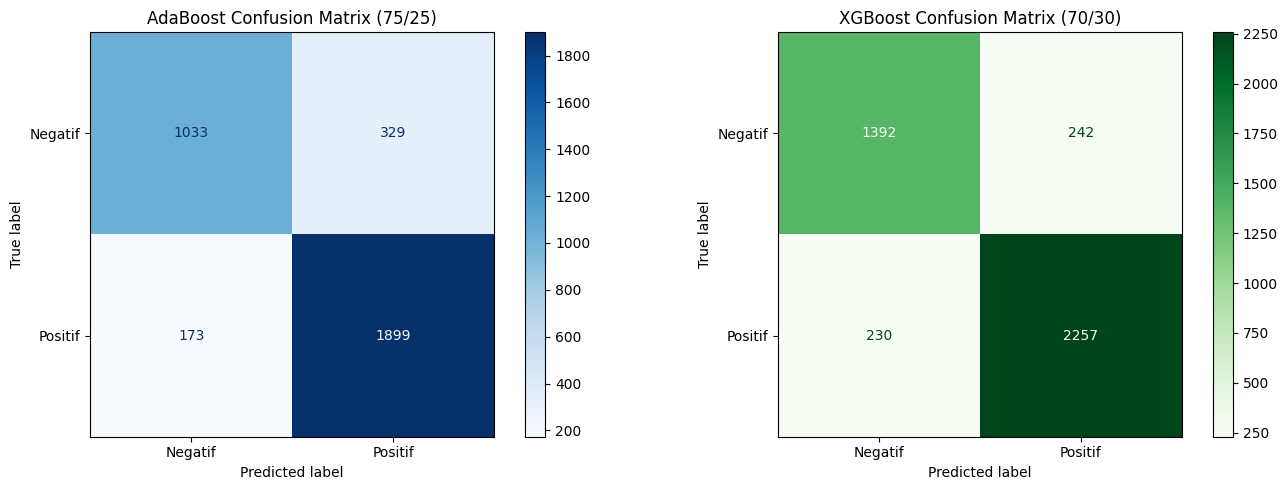

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm_ada = confusion_matrix(y_test_ada, preds_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=['Negatif', 'Positif'])
disp_ada.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('AdaBoost Confusion Matrix (75/25)')

cm_xgb = confusion_matrix(y_test_xgb, preds_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Negatif', 'Positif'])
disp_xgb.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('XGBoost Confusion Matrix (70/30)')

plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(final_ada, 'adaboost_final.pkl')
joblib.dump(vec_ada, 'vectorizer_adaboost.pkl')

joblib.dump(final_xgb, 'final_xgb_model.pkl')
joblib.dump(vec_xgb, 'vectorizer_xgboost.pkl')

['vectorizer_xgboost.pkl']